In [1]:
# 텐서 생성
import torch


print(torch.tensor([1, 2, 3]))
# 차이 파악
print(torch.Tensor([[1, 2, 3], [4, 5, 6]]))
print(torch.LongTensor([1, 2, 3]))
print(torch.FloatTensor([1, 2, 3]))

tensor([1, 2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([1, 2, 3])
tensor([1., 2., 3.])


In [3]:
# 텐서 속성
tensor = torch.rand(1, 2)
print(tensor)
print(tensor.shape)
print(tensor.dtype)
print(tensor.device)
# 참고
tensor.size()

tensor([[0.8104, 0.3551]])
torch.Size([1, 2])
torch.float32
cpu


torch.Size([1, 2])

In [5]:
# 텐서 차원 변환
tensor = torch.rand(1, 2)
print(tensor)
print(tensor.shape)

tensor([[0.8913, 0.3580]])
torch.Size([1, 2])


In [7]:

tensor = tensor.reshape(2, 1)
print(tensor)
print(tensor.shape)

tensor([[0.8913],
        [0.3580]])
torch.Size([2, 1])


In [9]:
# 텐서 자료형 설정
tensor = torch.rand((3, 3), dtype=torch.float)
print(tensor)

tensor([[0.8454, 0.7743, 0.0578],
        [0.0549, 0.4247, 0.2122],
        [0.8916, 0.8667, 0.5890]])


In [11]:
# 6. 텐서 장치 변환

device = "cuda" if torch.cuda.is_available() else "cpu"
cpu = torch.FloatTensor([1, 2, 3])
gpu = torch.cuda.FloatTensor([1, 2, 3])

# 장치 설정해서 텐서 생성
tensor = torch.rand((1, 1), device=device)
print(device)
print(cpu)
print(gpu)
print(tensor)

cuda
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([[0.1215]], device='cuda:0')


C:\Users\hugctx\AppData\Local\Temp\ipykernel_40108\676717109.py:5: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\tensor\python_tensor.cpp:80.)
  gpu = torch.cuda.FloatTensor([1, 2, 3])


In [13]:
cpu = torch.FloatTensor([1, 2, 3])
gpu = cpu.cuda()
gpu2cpu = gpu.cpu()
cpu2gpu = cpu.to("cuda")
print(cpu)
print(gpu)
print(gpu2cpu)
print(cpu2gpu)

tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')


In [15]:
# 예제 7 넘파이 배열의 텐서 변환
import numpy as np


ndarray = np.array([1, 2, 3], dtype=np.uint8)
# tensor()
print(torch.tensor(ndarray))
# Tensor()
print(torch.Tensor(ndarray))
# from_numpy()
print(torch.from_numpy(ndarray))

tensor([1, 2, 3], dtype=torch.uint8)
tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.uint8)


In [17]:
# 예제 3.08 텐서의 넘파이 배열 변환
tensor = torch.cuda.FloatTensor([1, 2, 3])
# ndarray = tensor.numpy()

ndarray = tensor.detach().cpu().numpy()
# ndarray = tensor.cpu().numpy()
print(ndarray)
print(type(ndarray))

[1. 2. 3.]
<class 'numpy.ndarray'>


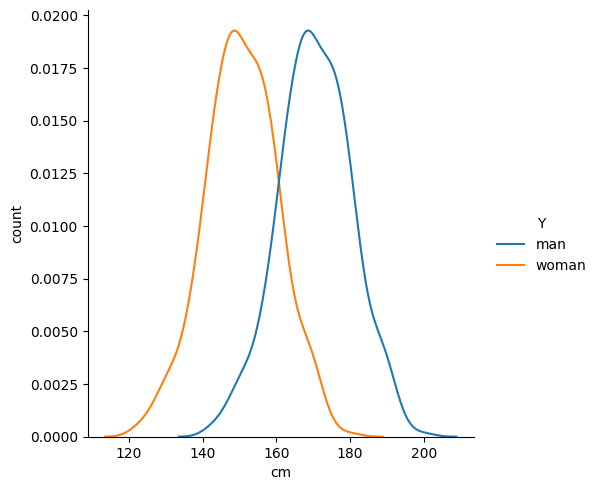

In [19]:
# 예제 3.09~3.10 비쌍체 t-검정
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt


man_height = stats.norm.rvs(loc=170, scale=10, size=500, random_state=1)
woman_height = stats.norm.rvs(loc=150, scale=10, size=500, random_state=1)

X = np.concatenate([man_height, woman_height])
Y = ["man"] * len(man_height) + ["woman"] * len(woman_height)

df = pd.DataFrame(list(zip(X, Y)), columns=["X", "Y"])
fig = sns.displot(data=df, x="X", hue="Y", kind="kde")
fig.set_axis_labels("cm", "count")
plt.show()

In [21]:
statistic, pvalue = stats.ttest_ind(man_height, woman_height, equal_var=True)

print("statistic:", statistic)
print("pvalue :", pvalue)
print("*:", pvalue < 0.05)
print("**:", pvalue < 0.001)

statistic: 31.96162891312776
pvalue : 6.2285854381989205e-155
*: True
**: True


In [23]:
# 단순 선형회귀 (넘파이)

import numpy as np

x = np.array(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)
y = np.array(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

In [25]:
weight = 0.0
bias = 0.0
learning_rate = 0.001

In [27]:
for epoch in range(10000):
    y_hat = weight * x + bias

    cost = ((y - y_hat) ** 2).mean()

    weight = weight - learning_rate * ((y_hat - y) * x).mean()
    bias = bias - learning_rate * (y_hat - y).mean()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight:.3f}, Bias : {bias:.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.860, Bias : -0.059, Cost : 1.406
Epoch : 2000, Weight : 0.864, Bias : -0.138, Cost : 1.393
Epoch : 3000, Weight : 0.867, Bias : -0.201, Cost : 1.385
Epoch : 4000, Weight : 0.870, Bias : -0.251, Cost : 1.380
Epoch : 5000, Weight : 0.872, Bias : -0.290, Cost : 1.377
Epoch : 6000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 7000, Weight : 0.874, Bias : -0.345, Cost : 1.374
Epoch : 8000, Weight : 0.875, Bias : -0.364, Cost : 1.373
Epoch : 9000, Weight : 0.876, Bias : -0.379, Cost : 1.373
Epoch : 10000, Weight : 0.877, Bias : -0.391, Cost : 1.373


In [29]:
# 단순 선형회귀 (파이토치)

x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

In [31]:
x.size(), y.shape 
# (torch.Size([30, 1]), torch.Size([30, 1])) 
# x.size(): torch.Size([30, 1]) → 30개 샘플, 1개 특성
# y.shape  # torch.Size([30, 1]) → 30개 샘플, 1개 출력

(torch.Size([30, 1]), torch.Size([30, 1]))

In [33]:
weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

In [35]:
from torch import optim
optimizer = optim.SGD([weight, bias], lr=learning_rate)

In [37]:
for epoch in range(10000):
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis - y) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight.item():.3f}, Bias : {bias.item():.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.864, Bias : -0.138, Cost : 1.393
Epoch : 2000, Weight : 0.870, Bias : -0.251, Cost : 1.380
Epoch : 3000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 4000, Weight : 0.875, Bias : -0.364, Cost : 1.373
Epoch : 5000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 6000, Weight : 0.878, Bias : -0.408, Cost : 1.372
Epoch : 7000, Weight : 0.878, Bias : -0.419, Cost : 1.372
Epoch : 8000, Weight : 0.878, Bias : -0.425, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.429, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.432, Cost : 1.372


In [41]:
import torch
from torch import optim


x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

optimizer = optim.SGD([weight, bias], lr=learning_rate)

for epoch in range(10000):
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis - y) ** 2)
    
    print(f"Epoch : {epoch+1:4d}")
    print(f"Step [1] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    optimizer.zero_grad()
    print(f"Step [2] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    cost.backward()
    print(f"Step [3] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    optimizer.step()
    print(f"Step [4] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")
    
    if epoch == 3:
        break

Epoch :    1
Step [1] : Gradient : None, Weight : 0.00000
Step [2] : Gradient : None, Weight : 0.00000
Step [3] : Gradient : tensor([-540.4854]), Weight : 0.00000
Step [4] : Gradient : tensor([-540.4854]), Weight : 0.54049
Epoch :    2
Step [1] : Gradient : tensor([-540.4854]), Weight : 0.54049
Step [2] : Gradient : None, Weight : 0.54049
Step [3] : Gradient : tensor([-198.9818]), Weight : 0.54049
Step [4] : Gradient : tensor([-198.9818]), Weight : 0.73947
Epoch :    3
Step [1] : Gradient : tensor([-198.9818]), Weight : 0.73947
Step [2] : Gradient : None, Weight : 0.73947
Step [3] : Gradient : tensor([-73.2604]), Weight : 0.73947
Step [4] : Gradient : tensor([-73.2604]), Weight : 0.81273
Epoch :    4
Step [1] : Gradient : tensor([-73.2604]), Weight : 0.81273
Step [2] : Gradient : None, Weight : 0.81273
Step [3] : Gradient : tensor([-26.9772]), Weight : 0.81273
Step [4] : Gradient : tensor([-26.9772]), Weight : 0.83970


In [43]:
import torch
from torch import nn
from torch import optim

In [45]:
x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

In [47]:
# weight = torch.zeros(1, requires_grad=True)
# bias = torch.zeros(1, requires_grad=True)

model = nn.Linear(1, 1)
criterion = nn.MSELoss() # 손실함수 정의
optimizer = optim.SGD(model.parameters(), lr=0.001) # 경사하강방법 결정

In [49]:
for epoch in range(10000):
    output = model(x)
    cost = criterion(output, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.8564]], requires_grad=True), Parameter containing:
tensor([0.0217], requires_grad=True)], Cost : 1.422
Epoch : 2000, Model : [Parameter containing:
tensor([[0.8649]], requires_grad=True), Parameter containing:
tensor([-0.1512], requires_grad=True)], Cost : 1.391
Epoch : 3000, Model : [Parameter containing:
tensor([[0.8702]], requires_grad=True), Parameter containing:
tensor([-0.2587], requires_grad=True)], Cost : 1.380
Epoch : 4000, Model : [Parameter containing:
tensor([[0.8735]], requires_grad=True), Parameter containing:
tensor([-0.3257], requires_grad=True)], Cost : 1.375
Epoch : 5000, Model : [Parameter containing:
tensor([[0.8755]], requires_grad=True), Parameter containing:
tensor([-0.3673], requires_grad=True)], Cost : 1.373
Epoch : 6000, Model : [Parameter containing:
tensor([[0.8768]], requires_grad=True), Parameter containing:
tensor([-0.3932], requires_grad=True)], Cost : 1.373
Epoch : 7000, Model : [Parameter containi

In [51]:
# 예제 3.29 ~ 3.33 다중 선형 회귀 -> 다변량 회귀
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader 


train_x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])
train_y = torch.FloatTensor([
    [0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]
])

In [53]:
train_x.shape # torch.Size([6, 2]) → 6개 샘플, 2개 특성(x1, x2) 다

torch.Size([6, 2])

In [55]:
train_y.shape  # torch.Size([6, 2]) → 6개 샘플, 2개 출력(y1, y2)

torch.Size([6, 2])

In [57]:
train_dataset = TensorDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)

In [59]:
model = nn.Linear(2, 2, bias=True)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [61]:
for epoch in range(20000):
    cost = 0.0
    
    for batch in train_dataloader:
        x, y = batch
        output = model(x)
        
        loss = criterion(output, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cost += loss

    cost = cost / len(train_dataloader)
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.4609, 0.2614],
        [0.8198, 0.4778]], requires_grad=True), Parameter containing:
tensor([-0.3125, -0.2674], requires_grad=True)], Cost : 0.055
Epoch : 2000, Model : [Parameter containing:
tensor([[0.6414, 0.1679],
        [0.8223, 0.4765]], requires_grad=True), Parameter containing:
tensor([-0.5865, -0.2712], requires_grad=True)], Cost : 0.014
Epoch : 3000, Model : [Parameter containing:
tensor([[0.7335, 0.1204],
        [0.8235, 0.4758]], requires_grad=True), Parameter containing:
tensor([-0.7261, -0.2731], requires_grad=True)], Cost : 0.004
Epoch : 4000, Model : [Parameter containing:
tensor([[0.7803, 0.0962],
        [0.8242, 0.4755]], requires_grad=True), Parameter containing:
tensor([-0.7972, -0.2741], requires_grad=True)], Cost : 0.001
Epoch : 5000, Model : [Parameter containing:
tensor([[0.8042, 0.0838],
        [0.8245, 0.4753]], requires_grad=True), Parameter containing:
tensor([-0.8334, -0.2746], requires_grad=True)]

In [65]:
# 34 편향 제거
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader 


train_x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])
train_y = torch.FloatTensor([
    [0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]
])

train_dataset = TensorDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)

In [67]:
model = nn.Linear(2, 2, bias=False)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [69]:
for epoch in range(20000):
    cost = 0.0
    for batch in train_dataloader:
        x, y = batch
        output = model(x)

        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost: {cost:.3f}')

Epoch : 1000, Model : [Parameter containing:
tensor([[ 0.8546, -0.1163],
        [ 0.4782,  0.7029]], requires_grad=True)], Cost: 0.071
Epoch : 2000, Model : [Parameter containing:
tensor([[ 1.0280, -0.2567],
        [ 0.6058,  0.5996]], requires_grad=True)], Cost: 0.045
Epoch : 3000, Model : [Parameter containing:
tensor([[ 1.1660, -0.3681],
        [ 0.7072,  0.5177]], requires_grad=True)], Cost: 0.028
Epoch : 4000, Model : [Parameter containing:
tensor([[ 1.2756, -0.4567],
        [ 0.7879,  0.4525]], requires_grad=True)], Cost: 0.018
Epoch : 5000, Model : [Parameter containing:
tensor([[ 1.3627, -0.5272],
        [ 0.8519,  0.4006]], requires_grad=True)], Cost: 0.011
Epoch : 6000, Model : [Parameter containing:
tensor([[ 1.4320, -0.5832],
        [ 0.9028,  0.3595]], requires_grad=True)], Cost: 0.007
Epoch : 7000, Model : [Parameter containing:
tensor([[ 1.4870, -0.6277],
        [ 0.9433,  0.3267]], requires_grad=True)], Cost: 0.004
Epoch : 8000, Model : [Parameter containing:
ten

### 비선형회귀

In [72]:
# 예제 35 라이브러리 프레임워크 초기화
import torch
import pandas as pd
# import torch.nn as nn
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [80]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:, 0].values
        self.y = df.iloc[:, 1].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y

    def __len__(self):
        return self.length

In [82]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2, 1)

    def forward(self, x):
        x = self.layer(x)
        return x

In [84]:
train_dataset = CustomDataset('../datasets/non_linear.csv')
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

In [86]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CustomModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [88]:
for epoch in range(10000):
    cost = 0.0
    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch : {epoch+1:4d}, Model: {list(model.parameters())}, cost: {cost:.3f}')

Epoch : 1000, Model: [Parameter containing:
tensor([[ 3.1004, -1.7008]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4680], device='cuda:0', requires_grad=True)], cost: 0.075
Epoch : 2000, Model: [Parameter containing:
tensor([[ 3.1002, -1.7032]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4702], device='cuda:0', requires_grad=True)], cost: 0.076
Epoch : 3000, Model: [Parameter containing:
tensor([[ 3.1003, -1.7036]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4723], device='cuda:0', requires_grad=True)], cost: 0.076
Epoch : 4000, Model: [Parameter containing:
tensor([[ 3.1004, -1.7032]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4742], device='cuda:0', requires_grad=True)], cost: 0.068
Epoch : 5000, Model: [Parameter containing:
tensor([[ 3.1002, -1.7032]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4759], device='cuda:0', requires_grad=True)], cost: 0

In [90]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True) #, drop_last=True)

for epoch in range(2):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        print(f'x_shape: {x.shape}')
        y = y.to(device)
        print(f'y_shape: {y.shape}')

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)
    print(len(train_dataloader))

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

x_shape: torch.Size([128, 2])
y_shape: torch.Size([128, 1])
x_shape: torch.Size([72, 2])
y_shape: torch.Size([72, 1])
2
x_shape: torch.Size([128, 2])
y_shape: torch.Size([128, 1])
x_shape: torch.Size([72, 2])
y_shape: torch.Size([72, 1])
2


In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

In [92]:
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(
            [
            [1 ** 2, 1],
            [5 ** 2, 5],
            [11 ** 2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)

tensor([[  1.8791],
        [ 69.4648],
        [356.8409]], device='cuda:0')


In [94]:
torch.save(
    model,
    "../models/model.pt"
)

In [96]:
torch.save(
    model.state_dict(),
    "../models/model_state_dict.pt"
)

### 검증용 데이트 세트를 통한 평가

In [99]:
import torch
import pandas as pd
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split

In [109]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:, 0].values
        self.y = df.iloc[:, 1].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y

    def __len__(self):
        return self.length

In [111]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2, 1)

    def forward(self, x):
        x = self.layer(x)
        return x

In [113]:
dataset = CustomDataset("../datasets/non_linear.csv")
dataset_size = len(dataset)
train_size = int(dataset_size * 0.8)
validation_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - validation_size

In [115]:
train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])
print(f'Train Data Size : {len(train_dataset)}')
print(f'Validation Data Size : {len(validation_dataset)}')
print(f'test data size : {len(test_dataset)}')

Train Data Size : 160
Validation Data Size : 20
test data size : 20


In [117]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=4, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, drop_last=True)

In [119]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [123]:
for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)
        
        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss
    cost = cost /len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch : {epoch + 1:4d}, model : {list(model.parameters())}, Cost : {cost:.3f}')

Epoch : 1000, model : [Parameter containing:
tensor([[ 3.0996, -1.7033]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4779], device='cuda:0', requires_grad=True)], Cost : 0.080
Epoch : 2000, model : [Parameter containing:
tensor([[ 3.0997, -1.7033]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4856], device='cuda:0', requires_grad=True)], Cost : 0.084
Epoch : 3000, model : [Parameter containing:
tensor([[ 3.1000, -1.7033]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4888], device='cuda:0', requires_grad=True)], Cost : 0.080
Epoch : 4000, model : [Parameter containing:
tensor([[ 3.1012, -1.7033]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4901], device='cuda:0', requires_grad=True)], Cost : 0.082
Epoch : 5000, model : [Parameter containing:
tensor([[ 3.1000, -1.7034]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4906], device='cuda:0', requires_grad=True)]

In [125]:
with torch.no_grad():
    model.eval()
    for x, y in validation_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        print(f'X : {x}')
        print(f'Y : {y}')
        print(f'Outputs : {output}')
        print("__" * 10)

X : tensor([[28.0900, -5.3000],
        [57.7600,  7.6000],
        [64.0000,  8.0000],
        [49.0000, -7.0000]], device='cuda:0')
Y : tensor([[ 96.7400],
        [166.8600],
        [184.8700],
        [164.1700]], device='cuda:0')
Outputs : tensor([[ 96.6245],
        [166.6554],
        [185.3239],
        [164.3609]], device='cuda:0')
____________________
X : tensor([[46.2400, -6.8000],
        [16.0000,  4.0000],
        [75.6900, -8.7000],
        [ 0.2500,  0.5000]], device='cuda:0')
Y : tensor([[155.4300],
        [ 43.6400],
        [250.0600],
        [  0.6700]], device='cuda:0')
Outputs : tensor([[155.4617],
        [ 43.2924],
        [250.0208],
        [  0.4145]], device='cuda:0')
____________________
X : tensor([[ 4.6240e+01,  6.8000e+00],
        [ 7.9210e+01,  8.9000e+00],
        [ 4.0000e-02,  2.0000e-01],
        [ 5.1840e+01, -7.2000e+00]], device='cuda:0')
Y : tensor([[ 1.3204e+02],
        [ 2.3119e+02],
        [-7.0000e-02],
        [ 1.7373e+02]], device=

In [127]:
# 모델 불러오기
import torch
from torch import nn

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2, 1)

    def forward(self, x):
        return self.layer(x)

In [131]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load("../models/model.pt", map_location=device, weights_only=False)
print(model)

CustomModel(
  (layer): Linear(in_features=2, out_features=1, bias=True)
)


In [133]:
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(
        [
            [1 ** 2, 1],
            [5 ** 2, 5],
            [11 ** 2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)
    

tensor([[  1.8791],
        [ 69.4648],
        [356.8409]], device='cuda:0')


In [139]:
# 모델 상태 불러 오기
model_state_dict = torch.load('../models/model_state_dict.pt', map_location=device)
model.load_state_dict(model_state_dict)

<All keys matched successfully>

In [141]:
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(
        [
            [1 ** 2, 1],
            [5 ** 2, 5],
            [11 ** 2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)

tensor([[  1.8791],
        [ 69.4648],
        [356.8409]], device='cuda:0')


In [145]:
# 51 체크 포인트 저장

checkpoint = 1
for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        torch.save(
            {
                "model": "CustomModel",
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "cost": cost,
                "description": f"CustomModel 체크포인트-{checkpoint}",
            },
            f"../models/checkpoint-{checkpoint}.pt",
        )
        checkpoint += 1

In [147]:
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(
        [
            [1 ** 2, 1],
            [5 ** 2, 5],
            [11 ** 2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)

tensor([[  1.8791],
        [ 69.4648],
        [356.8409]], device='cuda:0')


In [149]:
checkpoint = torch.load('../models/checkpoint-6.pt')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
checkpoint_epoch = checkpoint['epoch']
checkpoint_description = checkpoint['description']
print(checkpoint_description)

CustomModel 체크포인트-6


In [151]:
for epoch in range(checkpoint_epoch + 1, 10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss
        if (epoch + 1) % 1000 == 0:
            print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 7000, Model : [Parameter containing:
tensor([[ 3.1000, -1.7033]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4824], device='cuda:0', requires_grad=True)], Cost : 0.080
Epoch : 7000, Model : [Parameter containing:
tensor([[ 3.1000, -1.7033]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4824], device='cuda:0', requires_grad=True)], Cost : 0.181
Epoch : 7000, Model : [Parameter containing:
tensor([[ 3.1000, -1.7033]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4824], device='cuda:0', requires_grad=True)], Cost : 0.230
Epoch : 7000, Model : [Parameter containing:
tensor([[ 3.1000, -1.7033]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4824], device='cuda:0', requires_grad=True)], Cost : 0.292
Epoch : 7000, Model : [Parameter containing:
tensor([[ 3.1000, -1.7033]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4824], device='cuda:0', requires_grad=True)]

## 이진분류 예제

In [2]:
import torch
import pandas as pd
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split

In [4]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:, 0].values # integer location 즉 행 번호로 접근
        self.x2 = df.iloc[:, 1].values
        self.x3 = df.iloc[:, 2].values
        self.y = df.iloc[:, 3].values
        self.length = len(df)

    # dataset[i]  →  (x_i, y_i)
    def __getitem__(self, index): 
        x = torch.FloatTensor([self.x1[index], self.x2[index], self.x3[index]])
        # y = torch.FloatTensor([int(self.y[index])])
        y = torch.FloatTensor(int(self.y[index]))
        y = y.unsqueeze(0) # 명확하게 차원 추가하는 것이 좋음
        # Dataset에서: y.shape == (1,)
        # DataLoader에서 batch로 묶이면: y_batch.shape == (batch_size, 1)

        return x, y

    # __len__은 **“이 Dataset에 샘플이 총 몇 개 있는지”**를 DataLoader에게 알려주는 역할
    def __len__(self):
        return self.length

In [6]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layer(x)
        

In [10]:
dataset = CustomDataset("../datasets/binary.csv")
dataset_size = len(dataset)
train_size = int(dataset_size * 0.8)
validation_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - validation_size
dataset_list = [train_size, validation_size, test_size]

In [14]:
train_dataset, validation_dataset, test_dataset = random_split(dataset, dataset_list, torch.manual_seed(4))
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size = 4, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, drop_last=True)

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [20]:
for epoch in range(10000):
    cost = 0.0
    
    for x, y in train_dataloader:
        
        x = x.to(device)
        y = y.to(device)
    
        output = model(x)
        loss = criterion(output, y)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch : {epoch + 1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}')

Epoch : 1000, Model : [Parameter containing:
tensor([[ 0.0026, -0.0008,  0.0033]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.0949], device='cuda:0', requires_grad=True)], Cost : 0.677
Epoch : 2000, Model : [Parameter containing:
tensor([[0.0037, 0.0010, 0.0046]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.0346], device='cuda:0', requires_grad=True)], Cost : 0.666
Epoch : 3000, Model : [Parameter containing:
tensor([[0.0032, 0.0005, 0.0038]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.1609], device='cuda:0', requires_grad=True)], Cost : 0.652
Epoch : 4000, Model : [Parameter containing:
tensor([[0.0046, 0.0014, 0.0047]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.2843], device='cuda:0', requires_grad=True)], Cost : 0.640
Epoch : 5000, Model : [Parameter containing:
tensor([[0.0051, 0.0025, 0.0056]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.4046], 

In [26]:
with torch.no_grad():
    model.eval()
    for x, y in validation_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        print(x)
        print(output)
        print(output >= torch.FloatTensor([0.5]).to(device))
        print('_' * 50)

tensor([[54., 69., 52.],
        [78., 87., 26.],
        [81., 67., 94.],
        [83., 60., 59.]], device='cuda:0')
tensor([[0.5821],
        [0.6006],
        [0.7108],
        [0.6392]], device='cuda:0')
tensor([[True],
        [True],
        [True],
        [True]], device='cuda:0')
__________________________________________________
tensor([[ 61.,   9.,  16.],
        [ 25.,  80.,  75.],
        [ 42.,  23.,   2.],
        [ 75., 100.,  76.]], device='cuda:0')
tensor([[0.4303],
        [0.5894],
        [0.3843],
        [0.7094]], device='cuda:0')
tensor([[False],
        [ True],
        [False],
        [ True]], device='cuda:0')
__________________________________________________
tensor([[16., 35., 65.],
        [99., 63., 97.],
        [54., 74., 68.],
        [24., 91.,  0.]], device='cuda:0')
tensor([[0.4835],
        [0.7401],
        [0.6223],
        [0.4433]], device='cuda:0')
tensor([[False],
        [ True],
        [ True],
        [False]], device='cuda:0')
________

### 예제 37 모델 구조와 초기값

In [29]:
import torch
from torch import nn, optim

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(2, 1),
            nn.Sigmoid()
        )
        
        self.layer1[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[0.4352, 0.3545],
                         [0.1951, 0.4835]])
        )

        self.layer1[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.1419,  0.0439])
        )

        self.layer2[0].weight.data = torch.nn.Parameter(
            torch.Tensor([[-0.1725,  0.1129]])
        )

        self.layer2[0].bias.data = torch.nn.Parameter(
            torch.Tensor([-0.3043])
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)

In [33]:
# 입력 (XOR 예시 중 하나)
x = torch.tensor([[1., 1.]], device=device)
y = torch.tensor([[0.]], device=device)

# -------------------------
# 갱신 전 파라미터 출력
# -------------------------
print("=== BEFORE UPDATE ===")
print("Layer1 weight:\n", model.layer1[0].weight.data)
print("Layer1 bias:\n", model.layer1[0].bias.data)
print("Layer2 weight:\n", model.layer2[0].weight.data)
print("Layer2 bias:\n", model.layer2[0].bias.data)

# -------------------------
# 학습 1 step
# -------------------------
optimizer.zero_grad()

y_hat = model(x)        # 순전파
loss = criterion(y_hat, y)  # 손실
loss.backward()         # 역전파
optimizer.step()        # 가중치 갱신

# -------------------------
# 갱신 후 파라미터 출력
# -------------------------
print("\n=== AFTER UPDATE ===")
print("Layer1 weight:\n", model.layer1[0].weight.data)
print("Layer1 bias:\n", model.layer1[0].bias.data)
print("Layer2 weight:\n", model.layer2[0].weight.data)
print("Layer2 bias:\n", model.layer2[0].bias.data)

=== BEFORE UPDATE ===
Layer1 weight:
 tensor([[0.4352, 0.3545],
        [0.1951, 0.4835]], device='cuda:0')
Layer1 bias:
 tensor([-0.1419,  0.0439], device='cuda:0')
Layer2 weight:
 tensor([[-0.1725,  0.1129]], device='cuda:0')
Layer2 bias:
 tensor([-0.3043], device='cuda:0')

=== AFTER UPDATE ===
Layer1 weight:
 tensor([[0.4514, 0.3707],
        [0.1848, 0.4732]], device='cuda:0')
Layer1 bias:
 tensor([-0.1257,  0.0336], device='cuda:0')
Layer2 weight:
 tensor([[-0.4452, -0.1668]], device='cuda:0')
Layer2 bias:
 tensor([-0.7197], device='cuda:0')


### 단층퍼셉트론 (예제 .358)

In [13]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

In [14]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:, 0].values
        self.x2 = df.iloc[:, 1].values
        self.y = df.iloc[:, 2].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x1[index], self.x2[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y

    def __len__(self):
        return self.length

In [15]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer = nn.Sequential(
            nn.Linear(2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layer(x)
        return x

In [16]:
train_dataset = CustomDataset("../datasets/perceptron.csv")
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [18]:
for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Cost : {cost:.3f}")

C:\Users\hugctx\AppData\Local\Temp\ipykernel_15072\4292200528.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
C:\Users\hugctx\AppData\Local\Temp\ipykernel_15072\4292200528.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Cost : 0.692
Epoch : 2000, Cost : 0.692
Epoch : 3000, Cost : 0.692
Epoch : 4000, Cost : 0.692
Epoch : 5000, Cost : 0.692
Epoch : 6000, Cost : 0.692
Epoch : 7000, Cost : 0.692
Epoch : 8000, Cost : 0.692
Epoch : 9000, Cost : 0.692
Epoch : 10000, Cost : 0.692


In [19]:
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ]).to(device)

    outputs = model(inputs)

    print("---------")
    print(outputs)
    print(outputs >= 0.5)

---------
tensor([[0.4674],
        [0.4999],
        [0.5038],
        [0.5363]], device='cuda:0')
tensor([[False],
        [False],
        [ True],
        [ True]], device='cuda:0')


### 다층 페셉트론 (예제 3.59)

In [1]:
import torch
import pandas as pd
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [3]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:, 0].values
        self.x2 = df.iloc[:, 1].values
        self.y = df.iloc[:, 2].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x1[index], self.x2[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y

    def __len__(self):
        return self.length


In [5]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

In [7]:
train_dataset = CustomDataset("../datasets/perceptron.csv")
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [10]:
for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Cost : {cost:.3f}")

C:\Users\hugctx\AppData\Local\Temp\ipykernel_29644\942258476.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
C:\Users\hugctx\AppData\Local\Temp\ipykernel_29644\942258476.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Cost : 0.693
Epoch : 2000, Cost : 0.692
Epoch : 3000, Cost : 0.683
Epoch : 4000, Cost : 0.526
Epoch : 5000, Cost : 0.390
Epoch : 6000, Cost : 0.362
Epoch : 7000, Cost : 0.348
Epoch : 8000, Cost : 0.347
Epoch : 9000, Cost : 0.345
Epoch : 10000, Cost : 0.346


In [12]:
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ]).to(device)
    outputs = model(inputs)
    
    print("---------")
    print(outputs)
    print(outputs >= 0.5)

---------
tensor([[0.0069],
        [0.9904],
        [0.5161],
        [0.5228]], device='cuda:0')
tensor([[False],
        [ True],
        [ True],
        [ True]], device='cuda:0')
